Задача 2: Разметка датасета с HF Datasets: статистический анализ и визуализация

Шаг 1: Установка необходимых библиотек и загрузка текста

In [ ]:
# Устанавливаем необходимые библиотеки
!pip install datasets nltk spacy -q

In [ ]:
# Импорт наших инструментов
import re
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datasets
import nltk, spacy
import pandas as pd
import numpy as np
from nltk import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize

In [ ]:
# Загружаем Spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Подключаем ресурсы NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Загрузка текста

In [ ]:
!wget https://raw.githubusercontent.com/vifirsanova/compling/refs/heads/main/tasks/task1/data.txt
with open("data.txt", "r", encoding="utf-8") as file:
    text=file.read()

--2025-02-19 13:22:36--  https://raw.githubusercontent.com/vifirsanova/compling/refs/heads/main/tasks/task1/data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444304 (434K) [text/plain]
Saving to: ‘data.txt.7’

data.txt.7          100%[===================>] 433.89K  --.-KB/s    in 0.05s   

2025-02-19 13:22:36 (9.39 MB/s) - ‘data.txt.7’ saved [444304/444304]



Шаг 2. Сегментация

In [ ]:
#Сегментация на уровне предложений:
sentences = []
for sentence in sent_tokenize(text):
    sentences.extend(sentence.split('\n\n'))
stop_words = set(stopwords.words('english'))
#Сегментация на уровне слов и удаление стоп-слов:
words = [word for word in word_tokenize(text) if word not in string.punctuation and word.isalpha() and word.lower() not in stop_words]
#Сегментация на уровне биграмм:
bigrams = list(ngrams(words, 2))

print(f'НА УРОВНЕ ПРЕДЛОЖЕНИЙ: {sentences[:10]}')
print(f'НА УРОВНЕ СЛОВ: {words[:10]}')
print(f'НА УРОВНЕ БИГРАММ: {bigrams[:10]}')

НА УРОВНЕ ПРЕДЛОЖЕНИЙ: ['Title: 5 Common SQL Mistakes and How to Avoid Them', 'Ever wondered how to effectively use 5 common sql mistakes and how to avoid them.', 'This topic is crucial for developers because it helps in creating efficient and reusable code.', "We'll cover the basics and also discuss some advanced techniques.", "By the end of this article, you'll have a clear understanding of how to implement this in your projects.", "To deepen your understanding, explore the additional resources we've shared.", "Don't hesitate to experiment and learn.", 'Title: Understanding Python Generators', "If you're new to coding, this guide will help you understand understanding python generators.", 'Through this blog, we aim to provide a clear explanation of the concepts, complete with code snippets and real-world applications.']
НА УРОВНЕ СЛОВ: ['Title', 'Common', 'SQL', 'Mistakes', 'Avoid', 'Ever', 'wondered', 'effectively', 'use', 'common']
НА УРОВНЕ БИГРАММ: [('Title', 'Common'), ('Common'

Шаг 3. Создаем Датафрейм

In [ ]:
# Создаем DataFrame для предложений
df_sentences = pd.DataFrame({"sentence": sentences})

# Создаем DataFrame для слов
df_words = pd.DataFrame({"word": words})

# Создаем DataFrame для биграмм
df_bigrams = pd.DataFrame({"bigram": [' '.join(b) for b in bi_grams]})

# Объединяем три DataFrame
final_df = pd.concat([df_sentences, df_words, df_bigrams], axis=1)
print(final_df.head(10))

                                            sentence         word  \
0  Title: 5 Common SQL Mistakes and How to Avoid ...        Title   
1  Ever wondered how to effectively use 5 common ...       Common   
2  This topic is crucial for developers because i...          SQL   
3  We'll cover the basics and also discuss some a...     Mistakes   
4  By the end of this article, you'll have a clea...        Avoid   
5  To deepen your understanding, explore the addi...         Ever   
6            Don't hesitate to experiment and learn.     wondered   
7             Title: Understanding Python Generators  effectively   
8  If you're new to coding, this guide will help ...          use   
9  Through this blog, we aim to provide a clear e...       common   

         bigram  
0       Title :  
1           : 5  
2      5 Common  
3    Common SQL  
4  SQL Mistakes  
5  Mistakes and  
6       and How  
7        How to  
8      to Avoid  
9    Avoid Them  


**Шаг 3: Статистический анализ**

Теперь проведем три типа статистического анализа.

1. Анализ уникальности данных

Доля уникальных слов: Рассчитать процент уникальных слов в корпусе.
Коэффициент лексического разнообразия (Type-Token Ratio, TTR): Отношение числа уникальных слов к общему количеству слов.

In [ ]:
#создаем множество уникальных слов из списка words и вычисляем процент уникальных слов по сравнению с общим количеством слов
unique_words = set(words)
percent_unique = (len(unique_words) / len(words)) * 100

#вычисляем коэффициент лексического разнообразия (ТТР), деля количество уникальных слов на общее количество слов. Это значение показывает, насколько разнообразен словарный запас текста
lexical_diversity = len(unique_words) / len(words)

print(f"Доля уникальных слов: {percent_unique:.2f}%")
print(f"Коэффициент лексического разнообразия (TTR): {lexical_diversity:.4f}")


Доля уникальных слов: 0.51%
Коэффициент лексического разнообразия (TTR): 0.0051


In [ ]:
#на всякий случай посчитаем не в процентах, а количество уникальных слов:
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)
print(f"Количество уникальных слов: {len(unique_words)}")
print(f"Коэффициент лексического разнообразия (TTR): {lexical_diversity:.4f}")

Количество уникальных слов: 197
Коэффициент лексического разнообразия (TTR): 0.0051


2. Анализ частоты POS-тегов

Используем библиотеку spacy для разметки текста на части речи (POS tagging) и выделения наиболее часто встречающихся POS-тегов.

In [ ]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
#Загрузка языковой модели spacy:
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(text)  #Используем переменную text, содержащую загруженный текст

In [ ]:
#Подсчет частоты POS-тегов:
pos_counts = Counter([token.pos_ for token in doc])

#Вывод 10 самых распространенных POS-тегов:
print("10 самых распространенных частей речи:")
for pos, count in pos_counts.most_common(10):
    print(f"{pos}: {count}")

10 самых распространенных частей речи:
NOUN: 17114
VERB: 13071
PUNCT: 9965
ADP: 8466
PRON: 7291
DET: 6892
ADJ: 5662
SPACE: 4000
AUX: 3956
PART: 3121


3. TF-IDF (определение ключевых слов)

TF-IDF (Term Frequency – Inverse Document Frequency) для определения важности терминов в тексте.

In [ ]:
#Импорт необходимых библиотек:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Создание списка предложений:
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]

In [ ]:
#применение TfidfVectorizer для определения 100 самых значимых слов:
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
#получаем список этих слов:
feature_names = tfidf_vectorizer.get_feature_names_out()

print("Топ-100 ключевых слов по значению TF-IDF:")
print(feature_names)

Топ-100 ключевых слов по значению TF-IDF:
['additional' 'advanced' 'also' 'and' 'api' 'approach' 'article' 'at'
 'avoid' 'basics' 'because' 'beginner' 'best' 'blog' 'building' 'by'
 'clear' 'code' 'coding' 'common' 'concepts' 'crucial' 'daunting' 'deepen'
 'demystifying' 'developers' 'discuss' 'don' 'efficient' 'end' 'example'
 'experience' 'experiment' 'explore' 'first' 'flask' 'for' 'functional'
 'generators' 'guide' 'have' 'helps' 'hesitate' 'how' 'if' 'implement'
 'implementing' 'in' 'integrating' 'into' 'is' 'it' 'learn' 'learning'
 'll' 'machine' 'makes' 'might' 'of' 'on' 'our' 'perfect' 'post'
 'practical' 'practices' 'process' 'programming' 'projects' 'provide'
 'python' 're' 'remember' 'resources' 'rest' 'seem' 'share' 'shared'
 'simplifies' 'some' 'started' 'step' 'techniques' 'the' 'these' 'this'
 'through' 'time' 'tips' 'title' 'to' 'topic' 'understanding' 'use' 've'
 'we' 'while' 'with' 'workflow' 'you' 'your']


Шаг 4: Визуализация данных

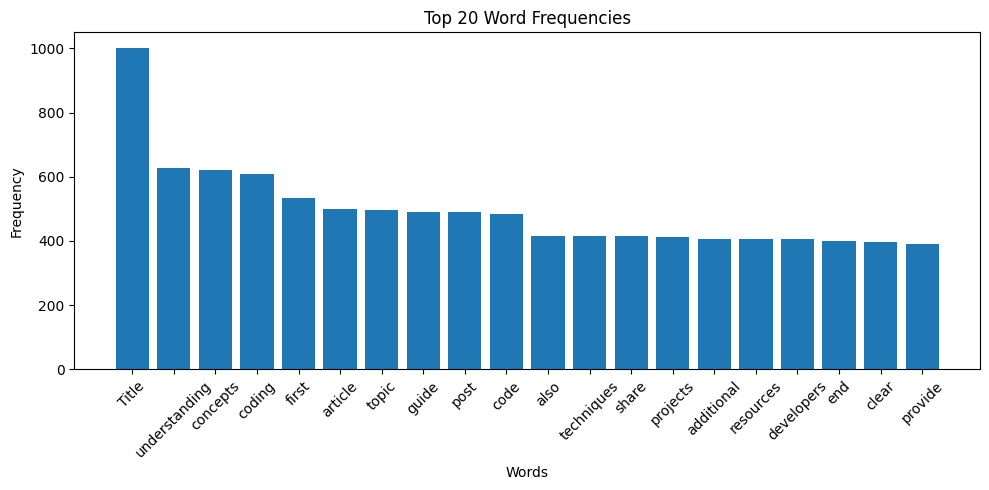

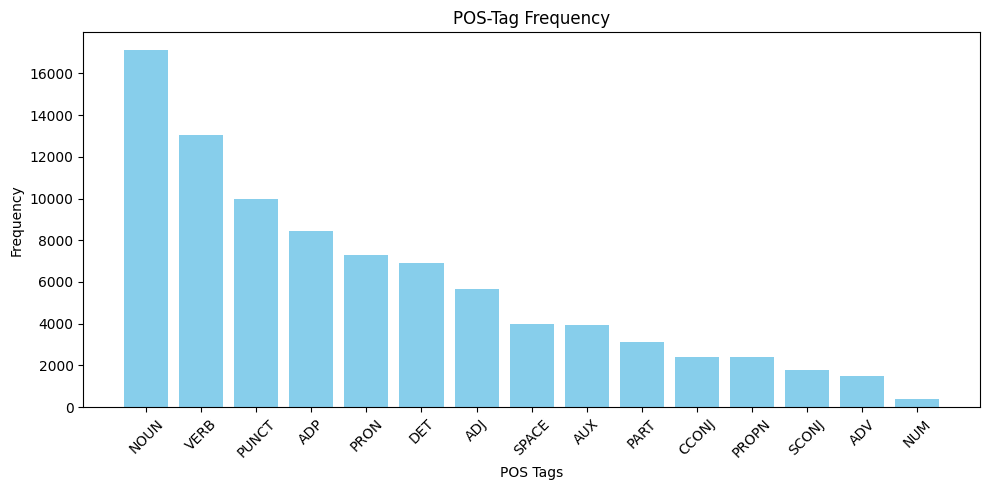

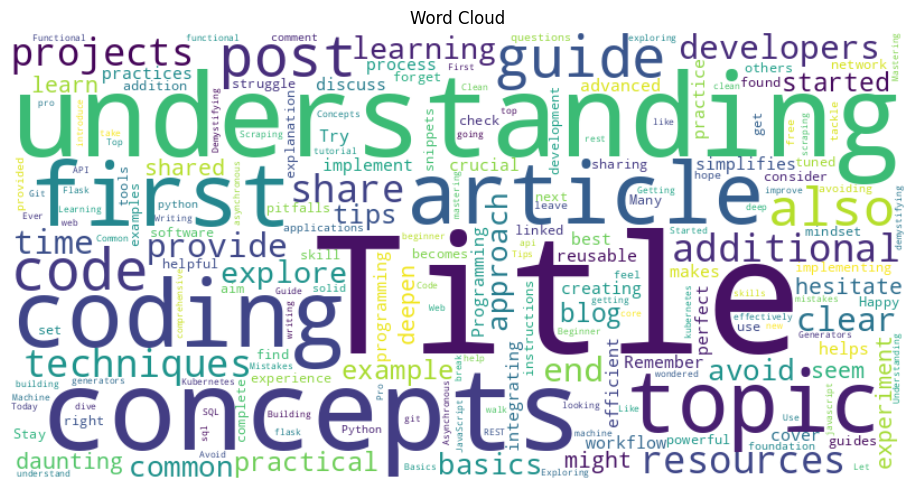

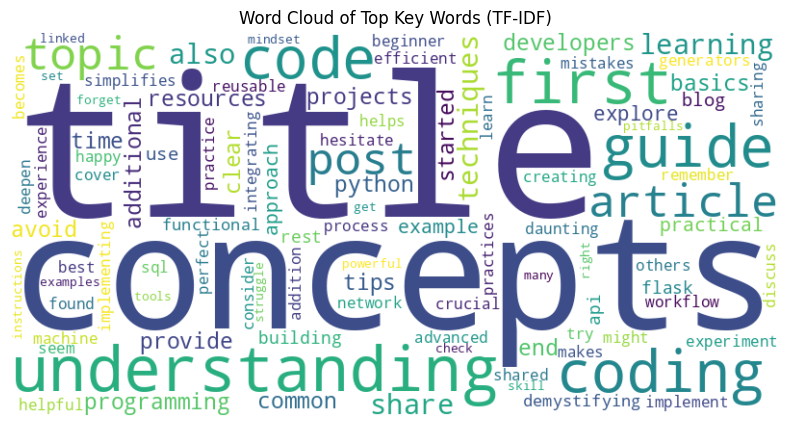

In [ ]:
#визуализация для частотного распределения слов (Word Frequency):

word_counts = Counter(words)

plt.figure(figsize=(10, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("frequency_plot.png")
plt.show()

#визуализация частотного распределения частей речи:

labels, values = zip(*pos_counts.most_common())

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title("POS-Tag Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("pos_frequency_plot.png")
plt.show()

# Word Cloud или облако слов:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

#Облако ключевых слов по значению TF-IDF:

filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_text = " ".join(filtered_words)
#Инициализация TF-IDF векторизатора:
tfidf_vectorizer = TfidfVectorizer(max_features=100)
#Преобразование текста в матрицу TF-IDF:
tfidf_matrix = tfidf_vectorizer.fit_transform([filtered_text])

#Получение слов и TF-IDF значений:
feature_names = tfidf_vectorizer.get_feature_names_out()
#Суммирует значения TF-IDF для каждого слова по документу. Метод A1 преобразует матрицу в одномерный массив.
tfidf_scores = tfidf_matrix.sum(axis=0).A1

#Создание словаря для слов и их TF-IDF значений:
word_tfidf = dict(zip(feature_names, tfidf_scores))

#визуализация:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Top Key Words (TF-IDF)")
plt.savefig("word_cloud_tf_idf.png")
plt.show()


Шаг 5: отправляем на HF Datasets сегментированные данные и оформляем карточку

In [ ]:
!pip install datasets -q -U # загружаем библиотеку для работы с HF Datasets

In [ ]:
# Создаем датасет
from datasets import Dataset
dataset = Dataset.from_pandas(df)
dataset.push_to_hub("ldlisss/task_2_advanced", token="") #перед загрузкой в гитхаб, я стерла токен
# просмотр результатов
dataset


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Dataset({
    features: ['Sentence', 'Word', 'Bigram'],
    num_rows: 5206
})